In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from astropy.io import fits
from glob import glob
from scipy.io import readsav
import cmcrameri.cm as cmcm
from astropy.visualization import ZScaleInterval
from juanfit import SpectrumFitSingle

In [6]:
idl_sav = readsav("../../sav/EIS/EQSPY_lvl1_offset_170821_tilt_cor.sav",verbose=True)
eis_img = idl_sav["new_data_offset"]
eis_err = idl_sav["new_err_offset"]
eis_wvl =  np.copy(idl_sav["wvl"])

--------------------------------------------------
Date: Wed Sep 28 16:10:21 2022
User: yjzhu
Host: Yingjies-MacBook-Pro.local
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2
--------------------------------------------------
Successfully read 8 records of which:
 - 5 are of type VARIABLE
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
--------------------------------------------------
Available variables:
 - wvl [<class 'numpy.ndarray'>]
 - new_data_offset [<class 'numpy.ndarray'>]
 - new_err_offset [<class 'numpy.ndarray'>]
 - window_start_index [<class 'numpy.ndarray'>]
 - window_end_index [<class 'numpy.ndarray'>]
--------------------------------------------------


In [7]:
eis_img.shape

(60, 182, 4096)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


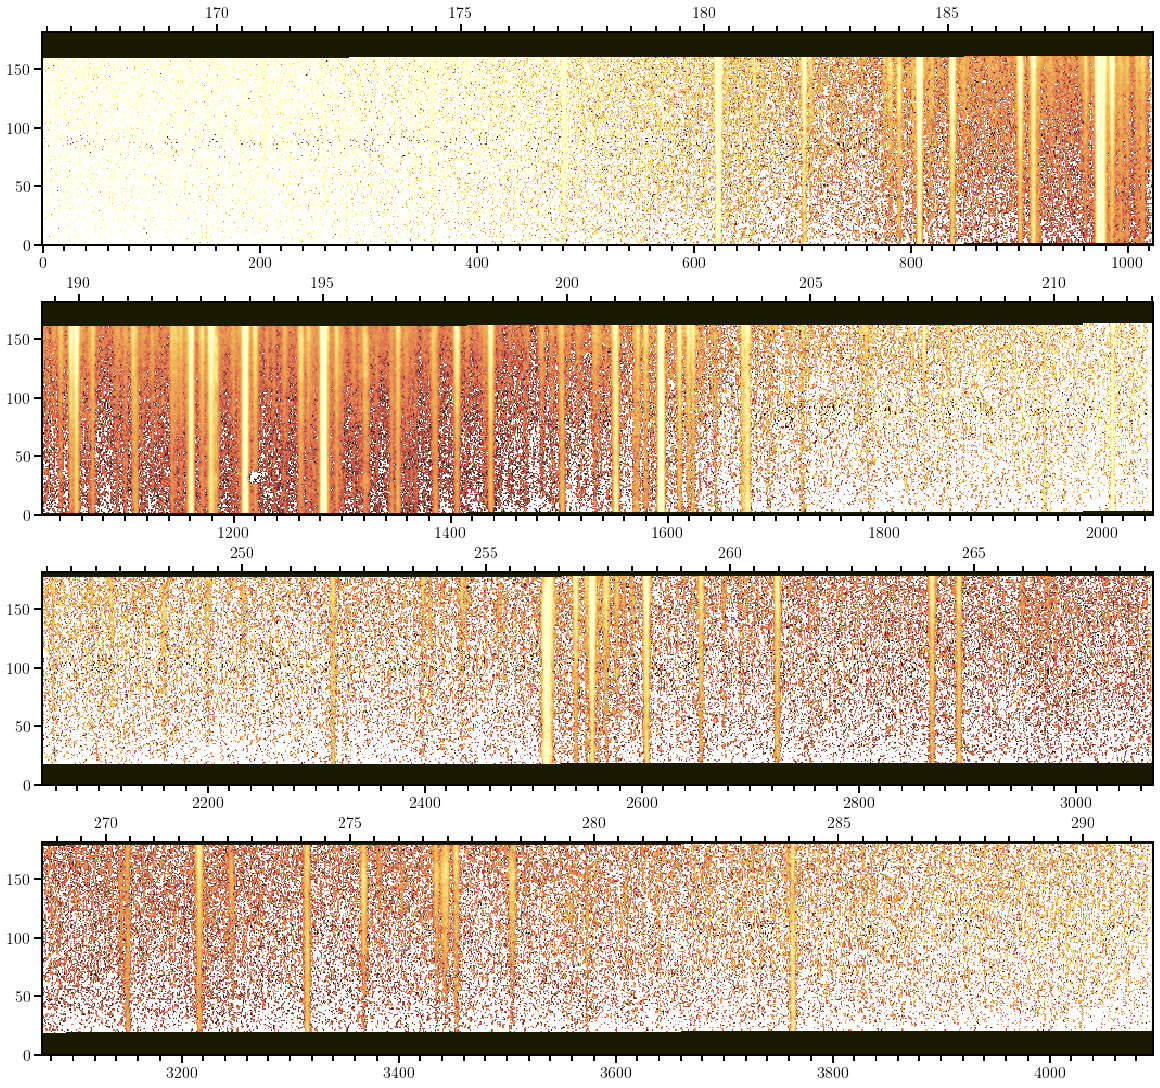

In [11]:
fig, axes = plt.subplots(4,1,figsize=(16,15),constrained_layout=True)

for ii in range(4):
    axes[ii].pcolormesh(np.arange(ii*1024,(ii+1)*1024),np.arange(0,160+22),
                    np.nan_to_num(np.log10(eis_img[10,:,ii*1024:(ii+1)*1024]),nan=-np.inf),
                    cmap=cmcm.lajolla_r,shading="auto",vmin=0,vmax=3)

    ax_wvl = axes[ii].twiny()
    ax_wvl.set_xlim(eis_wvl[ii*1024],eis_wvl[(ii+1)*1024-1])
    axes[ii].xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))

    for ax_ in (axes[ii], ax_wvl):
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=2,length=8)
        ax_.tick_params(which="minor",width=2,length=6)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


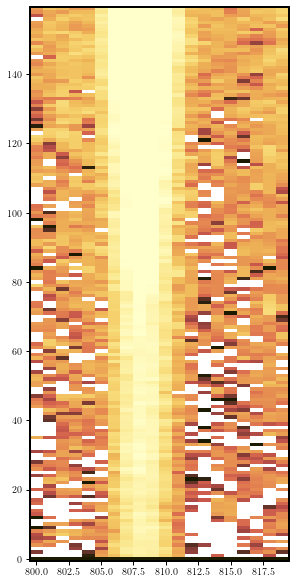

In [14]:
FeX_184_slice = slice(800,820)

fig, ax = plt.subplots(figsize=(4,8),constrained_layout=True)
ax.pcolormesh(np.arange(FeX_184_slice.start, FeX_184_slice.stop), np.arange(160),
            np.nan_to_num(np.log10(eis_img[10,:160,FeX_184_slice]),nan=-np.inf),
                    cmap=cmcm.lajolla_r,shading="auto",vmin=0,vmax=3)

In [ ]:
xcen, ycen = (-895.061, 390.811)
fovx, fovy = (119.808, 160.0)
xstart = xcen - fovx/2.
xend = xcen + fovx/2.
ystart = ycen - fovy/2.
yend = ycen + fovy/2.

fig, ax = plt.subplots(figsize=(6,8),constrained_layout=True)

ax.pcolormesh()